In [1]:
import pandas as pd

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt




%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
pd.set_option('display.max_rows', 500)

import plotly.graph_objects as go
import plotly.offline as py
from fbprophet.plot import plot_plotly

In [2]:
from fbprophet import Prophet

In [3]:
%matplotlib inline
plt.style.use('fivethirtyeight')

# Trivial Forecast (rolling mean)

In [4]:
df = pd.DataFrame({'X': np.arange(0,10)}) # generate an input df
df['y']=df.rolling(3).mean() # take the window and write the average as the result

In [5]:
df

,X,y
0,0,NaN
1,1,NaN
2,2,1.0
3,3,2.0
4,4,3.0
5,5,4.0
6,6,5.0
7,7,6.0
8,8,7.0
9,9,8.0


# Small Data Set

In [6]:
df_all = pd.read_csv('../data/processed/COVID_small.csv',sep=';')
df=df_all[['date','Germany']]
df=df.rename(columns={'date': 'ds',
                        'Germany': 'y'})

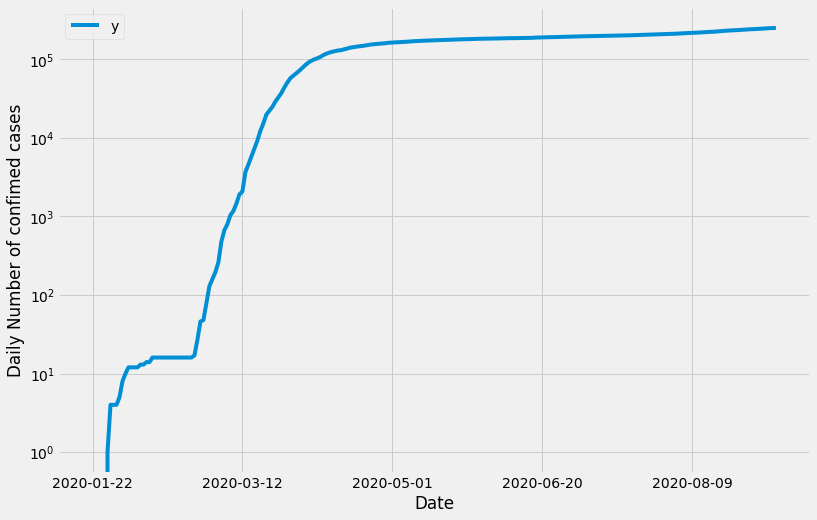

In [7]:

ax = df.set_index('ds').plot(figsize=(12, 8),
                             logy=True)
ax.set_ylabel('Daily Number of confimed cases')
ax.set_xlabel('Date')

plt.show()

In [26]:
my_model = Prophet(growth='logistic')   # logistic model

In [27]:
df['cap']=1000000.
my_model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future_dates = my_model.make_future_dataframe(periods=7, freq='D')
future_dates['cap']=1000000.
future_dates.tail()

,ds,cap
231,2020-09-09,1000000.0
232,2020-09-10,1000000.0
233,2020-09-11,1000000.0
234,2020-09-12,1000000.0
235,2020-09-13,1000000.0


In [29]:
forecast = my_model.predict(future_dates)

C:\Users\bansi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\bansi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



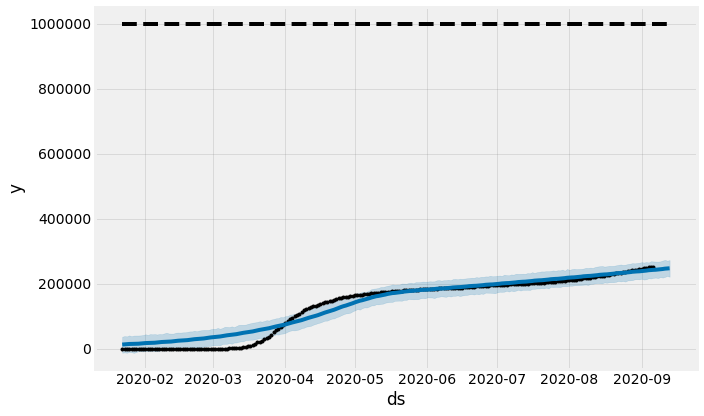

In [30]:
my_model.plot(forecast,
              uncertainty=True ); # since fbprohet is rendering the output

In [31]:
fig = plot_plotly(my_model, forecast)  # This returns a plotly Figure

fig.update_layout(
    width=1024,
    height=900,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,5.5])
py.iplot(fig)

In [32]:
forecast.sort_values(by='ds').head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,13424.531559,1000000.0,-12095.245725,37017.223094,13424.531559,13424.531559,-393.524792,-393.524792,-393.524792,-393.524792,-393.524792,-393.524792,0.0,0.0,0.0,13031.006767
1,2020-01-23,13766.760635,1000000.0,-10956.816791,39136.425033,13766.760635,13766.760635,-33.559221,-33.559221,-33.559221,-33.559221,-33.559221,-33.559221,0.0,0.0,0.0,13733.201414
2,2020-01-24,14117.589249,1000000.0,-12082.465186,38077.056714,14117.589249,14117.589249,385.580033,385.580033,385.580033,385.580033,385.580033,385.580033,0.0,0.0,0.0,14503.169283
3,2020-01-25,14477.227051,1000000.0,-9561.999960,41176.766115,14477.227051,14477.227051,343.070253,343.070253,343.070253,343.070253,343.070253,343.070253,0.0,0.0,0.0,14820.297305
4,2020-01-26,14845.888469,1000000.0,-10313.284344,38704.582387,14845.888469,14845.888469,136.531642,136.531642,136.531642,136.531642,136.531642,136.531642,0.0,0.0,0.0,14982.420111


C:\Users\bansi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\bansi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\bansi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\bansi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a 

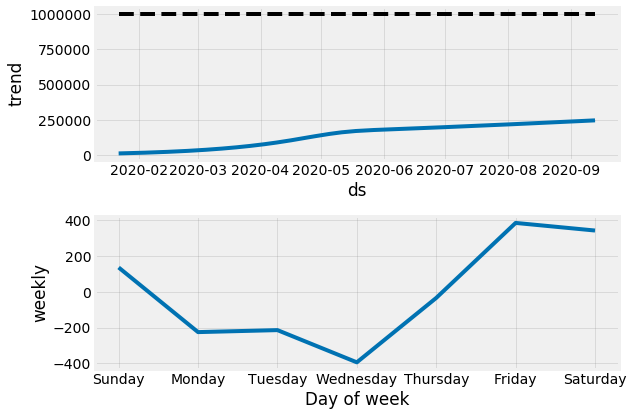

In [33]:
my_model.plot_components(forecast);

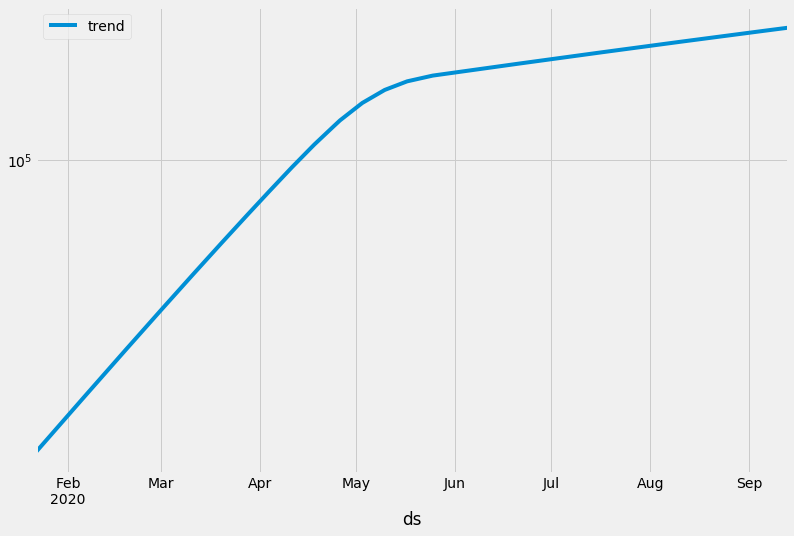

In [34]:
forecast[['ds','trend']].set_index('ds').plot(figsize=(12, 8),logy=True)

# Cross Validation

In [35]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(my_model, 
                         initial='40 days', # we take the first 30 days for training
                         period='1 days',  # every  days a new prediction run
                         horizon = '7 days') #we predict 7days into the future

INFO:fbprophet:Making 182 forecasts with cutoffs between 2020-03-02 00:00:00 and 2020-08-30 00:00:00


In [36]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-03,-1.700609,-44.727098,41.838044,196,2020-03-02
1,2020-03-04,-2.390044,-50.128435,39.170543,262,2020-03-02
2,2020-03-05,1.011665,-42.882277,42.584543,482,2020-03-02
3,2020-03-06,1.906653,-43.038667,45.911916,670,2020-03-02
4,2020-03-07,7.794951,-32.984037,50.264690,799,2020-03-02


In [39]:
df_cv.sort_values(by=['cutoff','ds'])[0:12]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-03,-1.700609,-44.727098,41.838044,196,2020-03-02
1,2020-03-04,-2.390044,-50.128435,39.170543,262,2020-03-02
2,2020-03-05,1.011665,-42.882277,42.584543,482,2020-03-02
3,2020-03-06,1.906653,-43.038667,45.911916,670,2020-03-02
4,2020-03-07,7.794951,-32.984037,50.264690,799,2020-03-02
5,2020-03-08,17.010121,-27.585574,58.390155,1040,2020-03-02
6,2020-03-09,22.552497,-25.406979,64.222290,1176,2020-03-02
7,2020-03-04,-5.921933,-9.852589,-1.981611,262,2020-03-03
8,2020-03-05,-2.569511,-6.415234,1.475746,482,2020-03-03
9,2020-03-06,-2.707545,-7.147559,1.612758,670,2020-03-03


In [40]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

In [41]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,1.439096e+09,37935.418363,29410.122583,0.194913,0.229135,0.274725
1,2 days,1.698393e+09,41211.567011,32502.341126,0.221404,0.271029,0.269231
2,3 days,2.007912e+09,44809.726978,35859.059644,0.249966,0.315151,0.274725
3,4 days,2.379181e+09,48776.843942,39485.429373,0.280492,0.352969,0.263736
4,5 days,2.827167e+09,53171.114654,43441.112843,0.312194,0.384853,0.263736
5,6 days,3.371119e+09,58061.341118,47742.887880,0.347300,0.406812,0.263736
6,7 days,4.036219e+09,63531.241235,52451.091136,0.384560,0.427228,0.263736


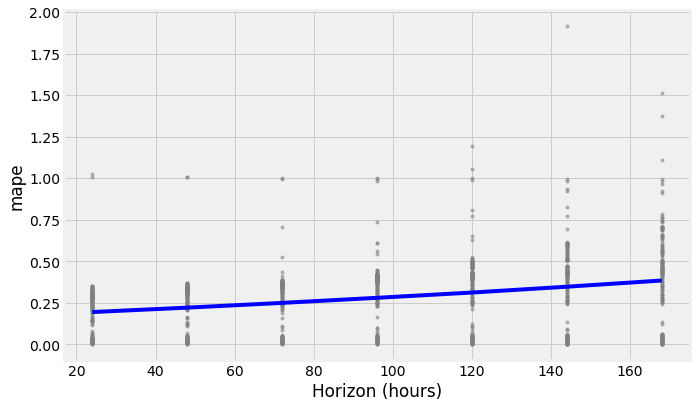

In [49]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape',)

# Diagonal Plot
## It gives a good understanding for the under and over estimation w.r.t magnitude.

In [44]:
horizon='7 days'
df_cv['horizon']=df_cv.ds-df_cv.cutoff

date_vec=df_cv[df_cv['horizon']==horizon]['ds']
y_hat=df_cv[df_cv['horizon']==horizon]['yhat']
y=df_cv[df_cv['horizon']==horizon]['y']

In [45]:
df_cv_7=df_cv[df_cv['horizon']==horizon]
df_cv_7.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,horizon
1245,2020-09-02,232587.142761,206945.764884,259754.635584,247411,2020-08-26,7 days
1252,2020-09-03,235171.007447,212354.309836,259673.008578,248840,2020-08-27,7 days
1259,2020-09-04,237874.832702,212053.262241,263179.343197,250283,2020-08-28,7 days
1266,2020-09-05,235414.397663,217022.766532,251671.414011,251058,2020-08-29,7 days
1273,2020-09-06,237254.718256,214840.153902,260430.045763,251728,2020-08-30,7 days


In [46]:
 type(df_cv['horizon'][0])

pandas._libs.tslibs.timedeltas.Timedelta

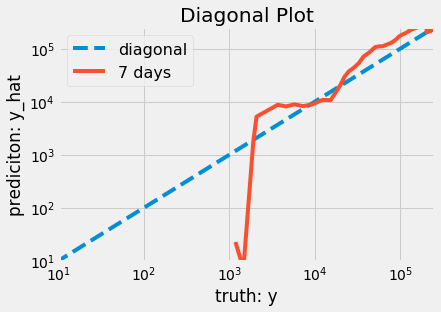

In [56]:
fig, ax = plt.subplots(1, 1)


ax.plot(np.arange(max(y)),np.arange(max(y)),'--',label='diagonal')
ax.plot(y,y_hat,'-',label=horizon)  # horizon is a np.timedelta objct

ax.set_title('Diagonal Plot')
ax.set_ylim(10, max(y))

ax.set_xlabel('truth: y')
ax.set_ylabel('prediciton: y_hat')
ax.set_yscale('log')

ax.set_xlim(10, max(y))
ax.set_xscale('log')
ax.legend(loc='best',
           prop={'size': 16});

# Trivial Forecast

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    ''' MAPE calculation '''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [52]:
parse_dates=['date']
df_all = pd.read_csv('../data/processed/COVID_small.csv',sep=';',parse_dates=parse_dates)
df_trivial=df_all[['date','Germany']]
df_trivial=df_trivial.rename(columns={'date': 'ds',
                        'Germany': 'y'})

## One of the standard forecast is a rolling mean
An other standard forecast is the exponentially-weighted moving average, see pandas.ewma

In [57]:
df_trivial['y_mean_r3']=df_trivial.y.rolling(3).mean() # take the average of 3 days

In [58]:
 # the result has to be shifted according to the prediciton horizon (here 7 days)

df_trivial['cutoff']=df_trivial['ds'].shift(7)
df_trivial['y_hat']=df_trivial['y_mean_r3'].shift(7)
df_trivial['horizon']=df_trivial['ds']-df_trivial['cutoff']
print('MAPE: '+str(mean_absolute_percentage_error(df_trivial['y_hat'].iloc[12:,], df_trivial['y'].iloc[12:,])))
df_trivial

MAPE: 131.6623139751226


,ds,y,y_mean_r3,cutoff,y_hat,horizon
0,2020-01-22,0,NaN,NaT,NaN,NaT
1,2020-01-23,0,NaN,NaT,NaN,NaT
2,2020-01-24,0,0.000000,NaT,NaN,NaT
3,2020-01-25,0,0.000000,NaT,NaN,NaT
4,2020-01-26,0,0.000000,NaT,NaN,NaT
5,2020-01-27,1,0.333333,NaT,NaN,NaT
6,2020-01-28,4,1.666667,NaT,NaN,NaT
7,2020-01-29,4,3.000000,2020-01-22,NaN,7 days
8,2020-01-30,4,4.000000,2020-01-23,NaN,7 days
9,2020-01-31,5,4.333333,2020-01-24,0.000000,7 days
